## The World Factbook Data Analysis
_by Mohammad Fazlan bin Harun_

About the dataset:  
This dataset contains 12 tables in XLS worksheet retrieved from https://www.cia.gov/the-world-factbook/.

1) Area  
Area compares the sum of all land and water areas delimited by international boundaries and/or coastlines.

2) Birth rate  
Birth rate compares the average annual number of births during a year per 1,000 persons in the population at midyear; also known as crude birth rate.

3) Death rate  
Death rate compares the average annual number of deaths during a year per 1,000 population at midyear; also known as crude death rate.

4) HIV/AIDS – adult prevalence rate  
HIV/AIDS - adult prevalence rate compares the percentage of adults (aged 15-49) living with HIV/AIDS.

5) Infant mortality rate  
Infant mortality rate compares the number of deaths of infants under one year old in a given year per 1,000 live births in the same year. This rate is often used as an indicator of the level of health in a country.

6) Life expectancy at birth  
Life expectancy at birth compares the average number of years to be lived by a group of people born in the same year, 
if mortality at each age remains constant in the future. Life expectancy at birth is also a measure of overall quality of life 
in a country and summarizes the mortality at all ages.

7) Median age  
This entry is the age that divides a population into two numerically equal groups; that is, half the people are younger than this age and half are older. It is a single index that summarizes the age distribution of a population. Currently, the median age ranges from a low of about 15 in Niger and Uganda to 40 or more in several European countries and Japan. See the entry for "Age structure" for the importance of a young versus an older age structure and, by implication, a low versus a higher median age.


8) Net migration rate  
Net migration rate compares the difference between the number of persons entering and leaving a country during the year per 1,000 persons (based on midyear population).

9) PLHIV  
People living with HIV/AIDS compares all people (adults and children) alive 
at year end with HIV infection, whether or not they have developed symptoms of AIDS.

10) Population  
Population compares estimates from the US Bureau of the Census based on statistics from population censuses, vital statistics registration systems, or sample surveys pertaining to the recent past and on assumptions about future trends.

11) Maternal mortality ratio  
The Maternal mortality rate (MMR) is the annual number of female deaths per 100,000 live births 
from any cause related to or aggravated by pregnancy or its management (excluding accidental or incidental causes).

12) Total fertility rate  
Total fertility rate (TFR) compares figures for the average number of children 
that would be born per woman if all women lived to the end of their childbearing years and 
bore children according to a given fertility rate at each age. 
TFR is a more direct measure of the level of fertility than the crude birth rate, 
since it refers to births per woman.


In [1]:
%load_ext sql

In [2]:
import sqlite3
import pandas as pd
from pathlib import Path
import glob

 <u>  __Create SQL database__  <u>

In [3]:
Path('CIA_WORLD_DATA.db').touch
conn = sqlite3.connect('CIA_WORLD_DATA.db')
c = conn.cursor()

<u>__List all the csv file name__<u>

In [4]:
all_csv = [ file for file in glob.glob ('*.csv') ]
all_csv

['area.csv',
 'Birth rate.csv',
 'Death rate.csv',
 'HIV_AIDS _adult prevalence rate.csv',
 'Infant mortality rate.csv',
 'Life expectancy at birth.csv',
 'Median age.csv',
 'Net migration rate.csv',
 'PLHIV.csv',
 'POPULATION.csv',
 'The Maternal mortality rate.csv',
 'Total fertility rate.csv']

<u>__Load csv file data using pandas__<u>

In [5]:
all_data = []
for data in all_csv:
    df = pd.read_csv(data)
    df['category'] = data[:-4]
    all_data.append(df)
    
print(all_data[0].head(2))
all_data[11].head(2)

         name        slug       value  date_of_information  ranking  \
0      Russia      russia  17,098,242                  NaN        1   
1  Antarctica  antarctica  14,200,000                  NaN        2   

         region category  
0  Central Asia     area  
1    Antarctica     area  


,name,slug,value,date_of_information,ranking,region,category
0,Niger,niger,6.82,2022 est.,1,Africa,Total fertility rate
1,Angola,angola,5.83,2022 est.,2,Africa,Total fertility rate


In [6]:
for df in all_data:
    df.drop(columns=['slug','date_of_information'],inplace=True)
    df['value'] = df['value'].astype(str).str.replace(',','').astype(float)
    print(df.tail(1))
    number_of_country = max(df.index)
    category = ((df['category'][0]))
    print(f"The number of country counted in this {category} data is {number_of_country}.")
    print('\n')

                        name  value  ranking  region category
255  Holy See (Vatican City)    0.0      257  Europe     area
The number of country counted in this area data is 255.


                          name  value  ranking         region    category
226  Saint Pierre and Miquelon   6.47      228  North America  Birth rate
The number of country counted in this Birth rate data is 226.


      name  value  ranking       region    category
227  Qatar   1.42      229  Middle East  Death rate
The number of country counted in this Death rate data is 227.


                     name  value  ranking       region  \
132  United Arab Emirates    0.1      133  Middle East   

                            category  
132  HIV_AIDS _adult prevalence rate  
The number of country counted in this HIV_AIDS _adult prevalence rate data is 132.


         name  value  ranking  region               category
225  Slovenia   1.52      227  Europe  Infant mortality rate
The number of country counted in thi

<u>__Load data files into SQLite database__<u>

In [7]:
area = (all_data[0]) 
area.to_sql('area', conn, if_exists='replace',index = False)

birth_rate = (all_data[1])
birth_rate.to_sql('birth', conn, if_exists='replace',index = False)

death_rate = (all_data[2])
death_rate.to_sql('death', conn, if_exists='replace',index = False)

hiv_aids_adult_prevalence_rate = (all_data[3])
hiv_aids_adult_prevalence_rate.to_sql('hiv_aids_adult_prevalence', conn, if_exists='replace',index = False)

infant_mortality_rate = (all_data[4])
infant_mortality_rate.to_sql('infant_mortality', conn, if_exists='replace', index = False)

life_expectancy_at_birth = (all_data[5])
life_expectancy_at_birth.to_sql('life_expectancy_at_birth', conn, if_exists='replace', index = False)

median_age = (all_data[6])
median_age.to_sql('median_age', conn, if_exists='replace', index = False)

net_migration_rate = (all_data[7])
net_migration_rate.to_sql('net_migration', conn, if_exists='replace',index = False)

plhiv = (all_data[8])
plhiv.to_sql('plhiv', conn, if_exists='replace', index = False)

population = (all_data[9])
population.to_sql('population', conn, if_exists='replace',index = False)

maternal_mortality_rate = (all_data[10])
maternal_mortality_rate.to_sql('maternal_mortality', conn, if_exists='replace',index = False)

total_fertility_rate = (all_data[11])
total_fertility_rate.to_sql('total_fertility', conn, if_exists='replace', index = False)

226

<u>__Connect to the SQLite database__<u>

In [8]:
%sql sqlite:///CIA_WORLD_DATA.db

<u>__Explore data__<u>

In [9]:
%sql SELECT type, name, sql from sqlite_master WHERE type='table';

 * sqlite:///CIA_WORLD_DATA.db
Done.


type,name,sql
table,area,"CREATE TABLE ""area"" (""name"" TEXT, ""value"" REAL, ""ranking"" INTEGER, ""region"" TEXT, ""category"" TEXT)"
table,birth,"CREATE TABLE ""birth"" (""name"" TEXT, ""value"" REAL, ""ranking"" INTEGER, ""region"" TEXT, ""category"" TEXT)"
table,death,"CREATE TABLE ""death"" (""name"" TEXT, ""value"" REAL, ""ranking"" INTEGER, ""region"" TEXT, ""category"" TEXT)"
table,hiv_aids_adult_prevalence,"CREATE TABLE ""hiv_aids_adult_prevalence"" (""name"" TEXT, ""value"" REAL, ""ranking"" INTEGER, ""region"" TEXT, ""category"" TEXT)"
table,infant_mortality,"CREATE TABLE ""infant_mortality"" (""name"" TEXT, ""value"" REAL, ""ranking"" INTEGER, ""region"" TEXT, ""category"" TEXT)"
table,life_expectancy_at_birth,"CREATE TABLE ""life_expectancy_at_birth"" (""name"" TEXT, ""value"" REAL, ""ranking"" INTEGER, ""region"" TEXT, ""category"" TEXT)"
table,median_age,"CREATE TABLE ""median_age"" (""name"" TEXT, ""value"" REAL, ""ranking"" INTEGER, ""region"" TEXT, ""category"" TEXT)"
table,net_migration,"CREATE TABLE ""net_migration"" (""name"" TEXT, ""value"" REAL, ""ranking"" INTEGER, ""region"" TEXT, ""category"" TEXT)"
table,plhiv,"CREATE TABLE ""plhiv"" (""name"" TEXT, ""value"" REAL, ""ranking"" INTEGER, ""region"" TEXT, ""category"" TEXT)"
table,population,"CREATE TABLE ""population"" (""name"" TEXT, ""value"" REAL, ""ranking"" INTEGER, ""region"" TEXT, ""category"" TEXT)"


In [10]:
%sql SELECT count(*) as 'total number of table' from sqlite_master WHERE type='table';

 * sqlite:///CIA_WORLD_DATA.db
Done.


total number of table
12


__Let see what CIA world factbook data has about Malaysia and others East Asia/Southeast Asia.__

How many resident in Malaysia has been living with HIV compare to other country in the East Asia/Southeast Asia region?

In [11]:
%%sql

SELECT  pl.name as country,
        pl.value as people_live_w_hiv, 
        p.value as population,
        (pl.value/ p.value) * 100 as in_percent,
        pl.ranking as world_rank_by_num_of_people_w_hiv
FROM plhiv pl
JOIN population p
ON pl.name = p.name
WHERE pl.region='East Asia/Southeast Asia'
ORDER BY in_percent DESC

 * sqlite:///CIA_WORLD_DATA.db
Done.


country,people_live_w_hiv,population,in_percent,world_rank_by_num_of_people_w_hiv
Thailand,500000.0,69648117.0,0.7178944981384062,17
Papua New Guinea,55000.0,9593498.0,0.5733049613394405,58
Cambodia,75000.0,16713015.0,0.44875206538138096,54
Burma,240000.0,57526449.0,0.41719939987952326,26
Malaysia,92000.0,33871431.0,0.2716153326973401,47
Vietnam,250000.0,103808319.0,0.24082848311993182,25
Indonesia,540000.0,277329163.0,0.1947144664335211,14
Laos,15000.0,7749595.0,0.193558502089464,91
Singapore,8000.0,5921231.0,0.13510704108655786,112
Philippines,120000.0,114597229.0,0.1047145738576279,38


Among East Asia/Southeast Asia, we can see Thailand has the biggest percentage of its resident who has been infected with HIV with 0.72% from its total population.

Meanwhile Indonesia has the largest number of resident infected with the HIV with 540,000 people ranked their country on number 14/143 on country with most people with HIV.

Malaysia has 92,000 residents who living with HIV make it the 47th country with most resident with HIV out of 143 countries. Percentage wise there are 0.27 percent from total population of Malaysia who are infected with the HIV.

How high is the Malaysia birth rate?

In [12]:
%%sql

SELECT  b.name Name,
        b.value birth_rate,
        d.value death_rate
FROM birth AS b
JOIN death AS d
ON b.name = d.name
WHERE b.region = 'East Asia/Southeast Asia'
LIMIT 11

 * sqlite:///CIA_WORLD_DATA.db
Done.


Name,birth_rate,death_rate
Timor-Leste,30.94,5.61
Papua New Guinea,29.03,5.54
Philippines,22.28,6.41
Laos,20.9,6.37
Cambodia,19.29,5.76
Burma,16.34,7.13
Brunei,16.14,3.79
Mongolia,15.84,6.3
Vietnam,15.69,5.77
Indonesia,15.32,6.75


Malaysia is at the 11th place among East Asia/Southeast Asia in birth rate which means the number of baby deliver per year is considerably low compared to other country in the same region. This is due to various factor such as family planning by married couple in Malaysia. While this method contribute to a better life condition it make Malaysia became a country with aging population.

Let combine all this data into single csv file and visualize the data in Microsoft Power BI.

In [13]:
combined_df = pd.concat(all_data)
combined_df.head(10)

,name,value,ranking,region,category
0,Russia,17098242.0,1,Central Asia,area
1,Antarctica,14200000.0,2,Antarctica,area
2,Canada,9984670.0,3,North America,area
3,United States,9833517.0,4,North America,area
4,China,9596960.0,5,East Asia/Southeast Asia,area
5,Brazil,8515770.0,6,South America,area
6,Australia,7741220.0,7,Australia - Oceania,area
7,India,3287263.0,8,South Asia,area
8,Argentina,2780400.0,9,South America,area
9,Kazakhstan,2724900.0,10,Central Asia,area


In [14]:
combined_df.dropna(inplace=True,axis=1)
combined_df.isnull().sum()

name        0
value       0
ranking     0
region      0
category    0
dtype: int64

In [15]:
pivot_cia_data = combined_df.pivot(index="name",columns="category",values=['value'])
pivot_cia_data

value                                             \
category          Birth rate Death rate HIV_AIDS _adult prevalence rate   
name                                                                      
Afghanistan            35.46      12.33                             NaN   
Akrotiri                 NaN        NaN                             NaN   
Albania                12.69       7.31                             NaN   
Algeria                18.52       4.32                             NaN   
American Samoa         16.70       6.10                             NaN   
...                      ...        ...                             ...   
Wallis and Futuna      12.27       5.79                             NaN   
West Bank              24.42       3.40                             NaN   
Yemen                  24.64       5.62                             NaN   
Zambia                 34.86       6.12                            11.1   
Zimbabwe               33.07       8.76                            11.9   

                                                                             \
category          Infant mortality rate Life expectancy at birth Median age   
name                                                                          
Afghanistan                      104.89                    53.65       19.5   
Akrotiri                            NaN                      NaN        NaN   
Albania                           10.82                    79.47       34.3   
Algeria                           19.72                    78.03       28.9   
American Samoa                    10.06                    75.32       27.2   
...                                 ...                      ...        ...   
Wallis and Futuna                  4.00                    80.67       34.0   
West Bank                         15.29                    76.38       21.9   
Yemen                             46.54                    67.51       19.8   
Zambia                            37.11                    66.26       16.9   
Zimbabwe                          28.53                    63.32       20.5   

                                                             \
category          Net migration rate      PLHIV  POPULATION   
name                                                          
Afghanistan                    -0.10    12000.0  38346720.0   
Akrotiri                         NaN        NaN         NaN   
Albania                        -3.23     1400.0   3095344.0   
Algeria                        -0.82    18000.0  44178884.0   
American Samoa                -29.80        NaN     45443.0   
...                              ...        ...         ...   
Wallis and Futuna              -3.96        NaN     15891.0   
West Bank                      -4.09        NaN   3000021.0   
Yemen                          -0.19    11000.0  30984689.0   
Zambia                          0.24  1500000.0  19642123.0   
Zimbabwe                       -4.83  1300000.0  15121004.0   

                                                                               
category          The Maternal mortality rate Total fertility rate       area  
name                                                                           
Afghanistan                             638.0                 4.62   652230.0  
Akrotiri                                  NaN                  NaN      123.0  
Albania                                  15.0                 1.54    28748.0  
Algeria                                 112.0                 2.51  2381740.0  
American Samoa                            NaN                 2.21      224.0  
...                                       ...                  ...        ...  
Wallis and Futuna                         NaN                 1.71      142.0  
West Bank                                27.0                 2.96     5860.0  
Yemen                                   164.0                 3.01   527968.0  
Zambia                

In [16]:
pivot_cia_data.to_csv('pivot_cia_data.csv',index=True)

The Asean Dashboard created using Microsoft Power BI visualizing Malaysia and other Asean countries data in the World Factbook CIA.

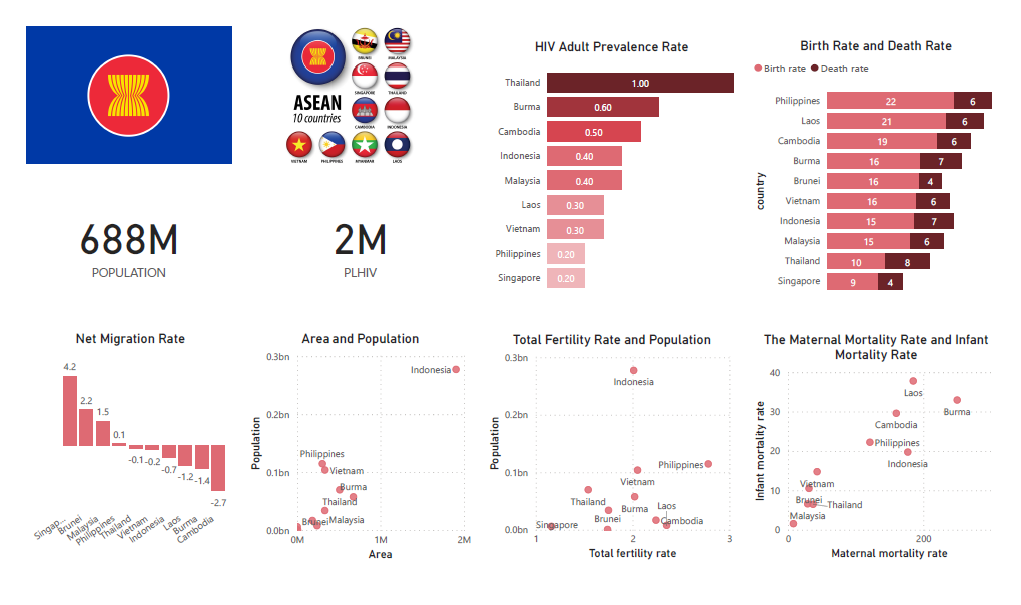